## <b>ETL Process</b>

Load the note of the image and then Bounding Boxes of the letters and symbols and store each extractted images in a array.

In [1]:
from pdf2image import convert_from_path
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


#### Load the pdf files and convert into array

In [2]:
# Path to your PDF file
pdf_path = "Note.pdf"

# Convert PDF to a list of images (one per page)
images = convert_from_path(pdf_path)

In [3]:
# Convert each image to grayscale
grayscale_images = [img.convert('L') for img in images]

In [44]:
# Convert each image to grayscale and then to binary (binarization)
binarized_images = []
for img in images:
    # Convert to grayscale
    gray_img = img.convert('L')
    
    # Apply binarization using a threshold (you can adjust the threshold value)
    threshold = 128  # You can change this value depending on your image
    binarized_img = gray_img.point(lambda p: 255 if p > threshold else 0)
    
    binarized_images.append(binarized_img)

In [45]:
binarized_images = np.array(binarized_images)/255
binarized_images[0]


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

#### Handwriting recognition with OpenCV, Keras, and TensorFlow

In [6]:
import tensorflow as tf

In [8]:
import pandas as pd

In [11]:
data_set = pd.read_csv("Datasets/A_Z_Handwritten_Data.csv")

In [12]:
data_set.shape

(372450, 785)

In [13]:
data_set = np.array(data_set)

In [14]:
alphabets = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

Data Sample count for each alphabet

In [26]:
labels = data_set[:,0]
#print(len(labels))
x = data_set[:,1:].reshape(372450,28,28)/255.
print((data_set[:,1:]).shape)
#del data_array
unique, counts = np.unique(labels, return_counts=True)
alphabets_list = list(zip(alphabets, counts))
for i in alphabets_list:
    print(i[0],' : ',i[1])

(372450, 784)
A  :  13869
B  :  8668
C  :  23409
D  :  10134
E  :  11440
F  :  1163
G  :  5762
H  :  7218
I  :  1120
J  :  8493
K  :  5603
L  :  11586
M  :  12336
N  :  19010
O  :  57825
P  :  19341
Q  :  5812
R  :  11566
S  :  48419
T  :  22495
U  :  29008
V  :  4182
W  :  10784
X  :  6272
Y  :  10859
Z  :  6076


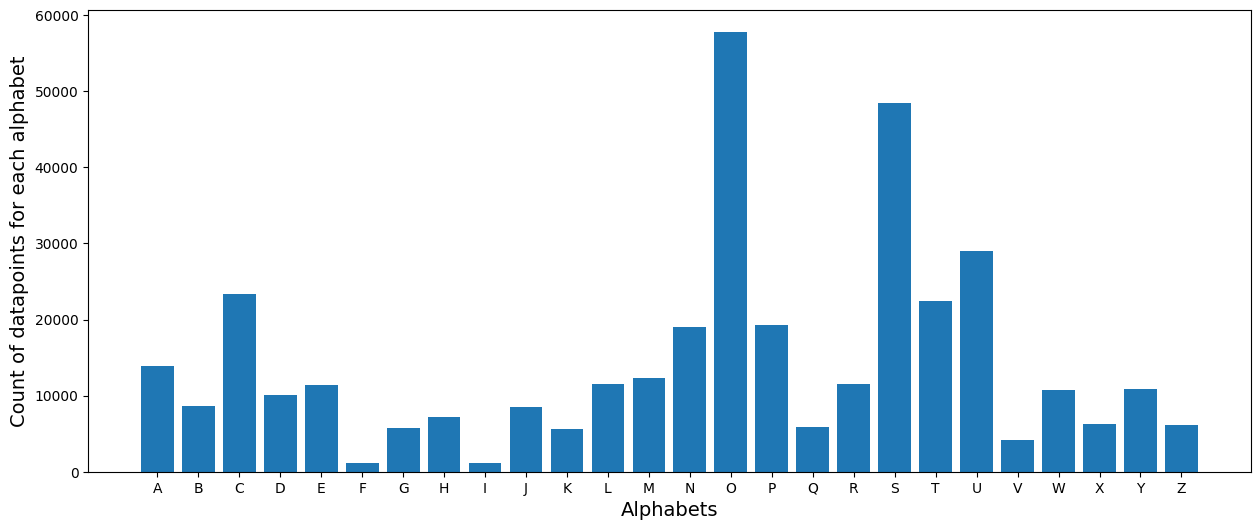

In [27]:
fig=plt.figure(figsize=(15,6))
plt.xlabel('Alphabets',fontsize=14)
plt.ylabel('Count of datapoints for each alphabet',fontsize=14)
plt.bar(alphabets,counts)
plt.show()

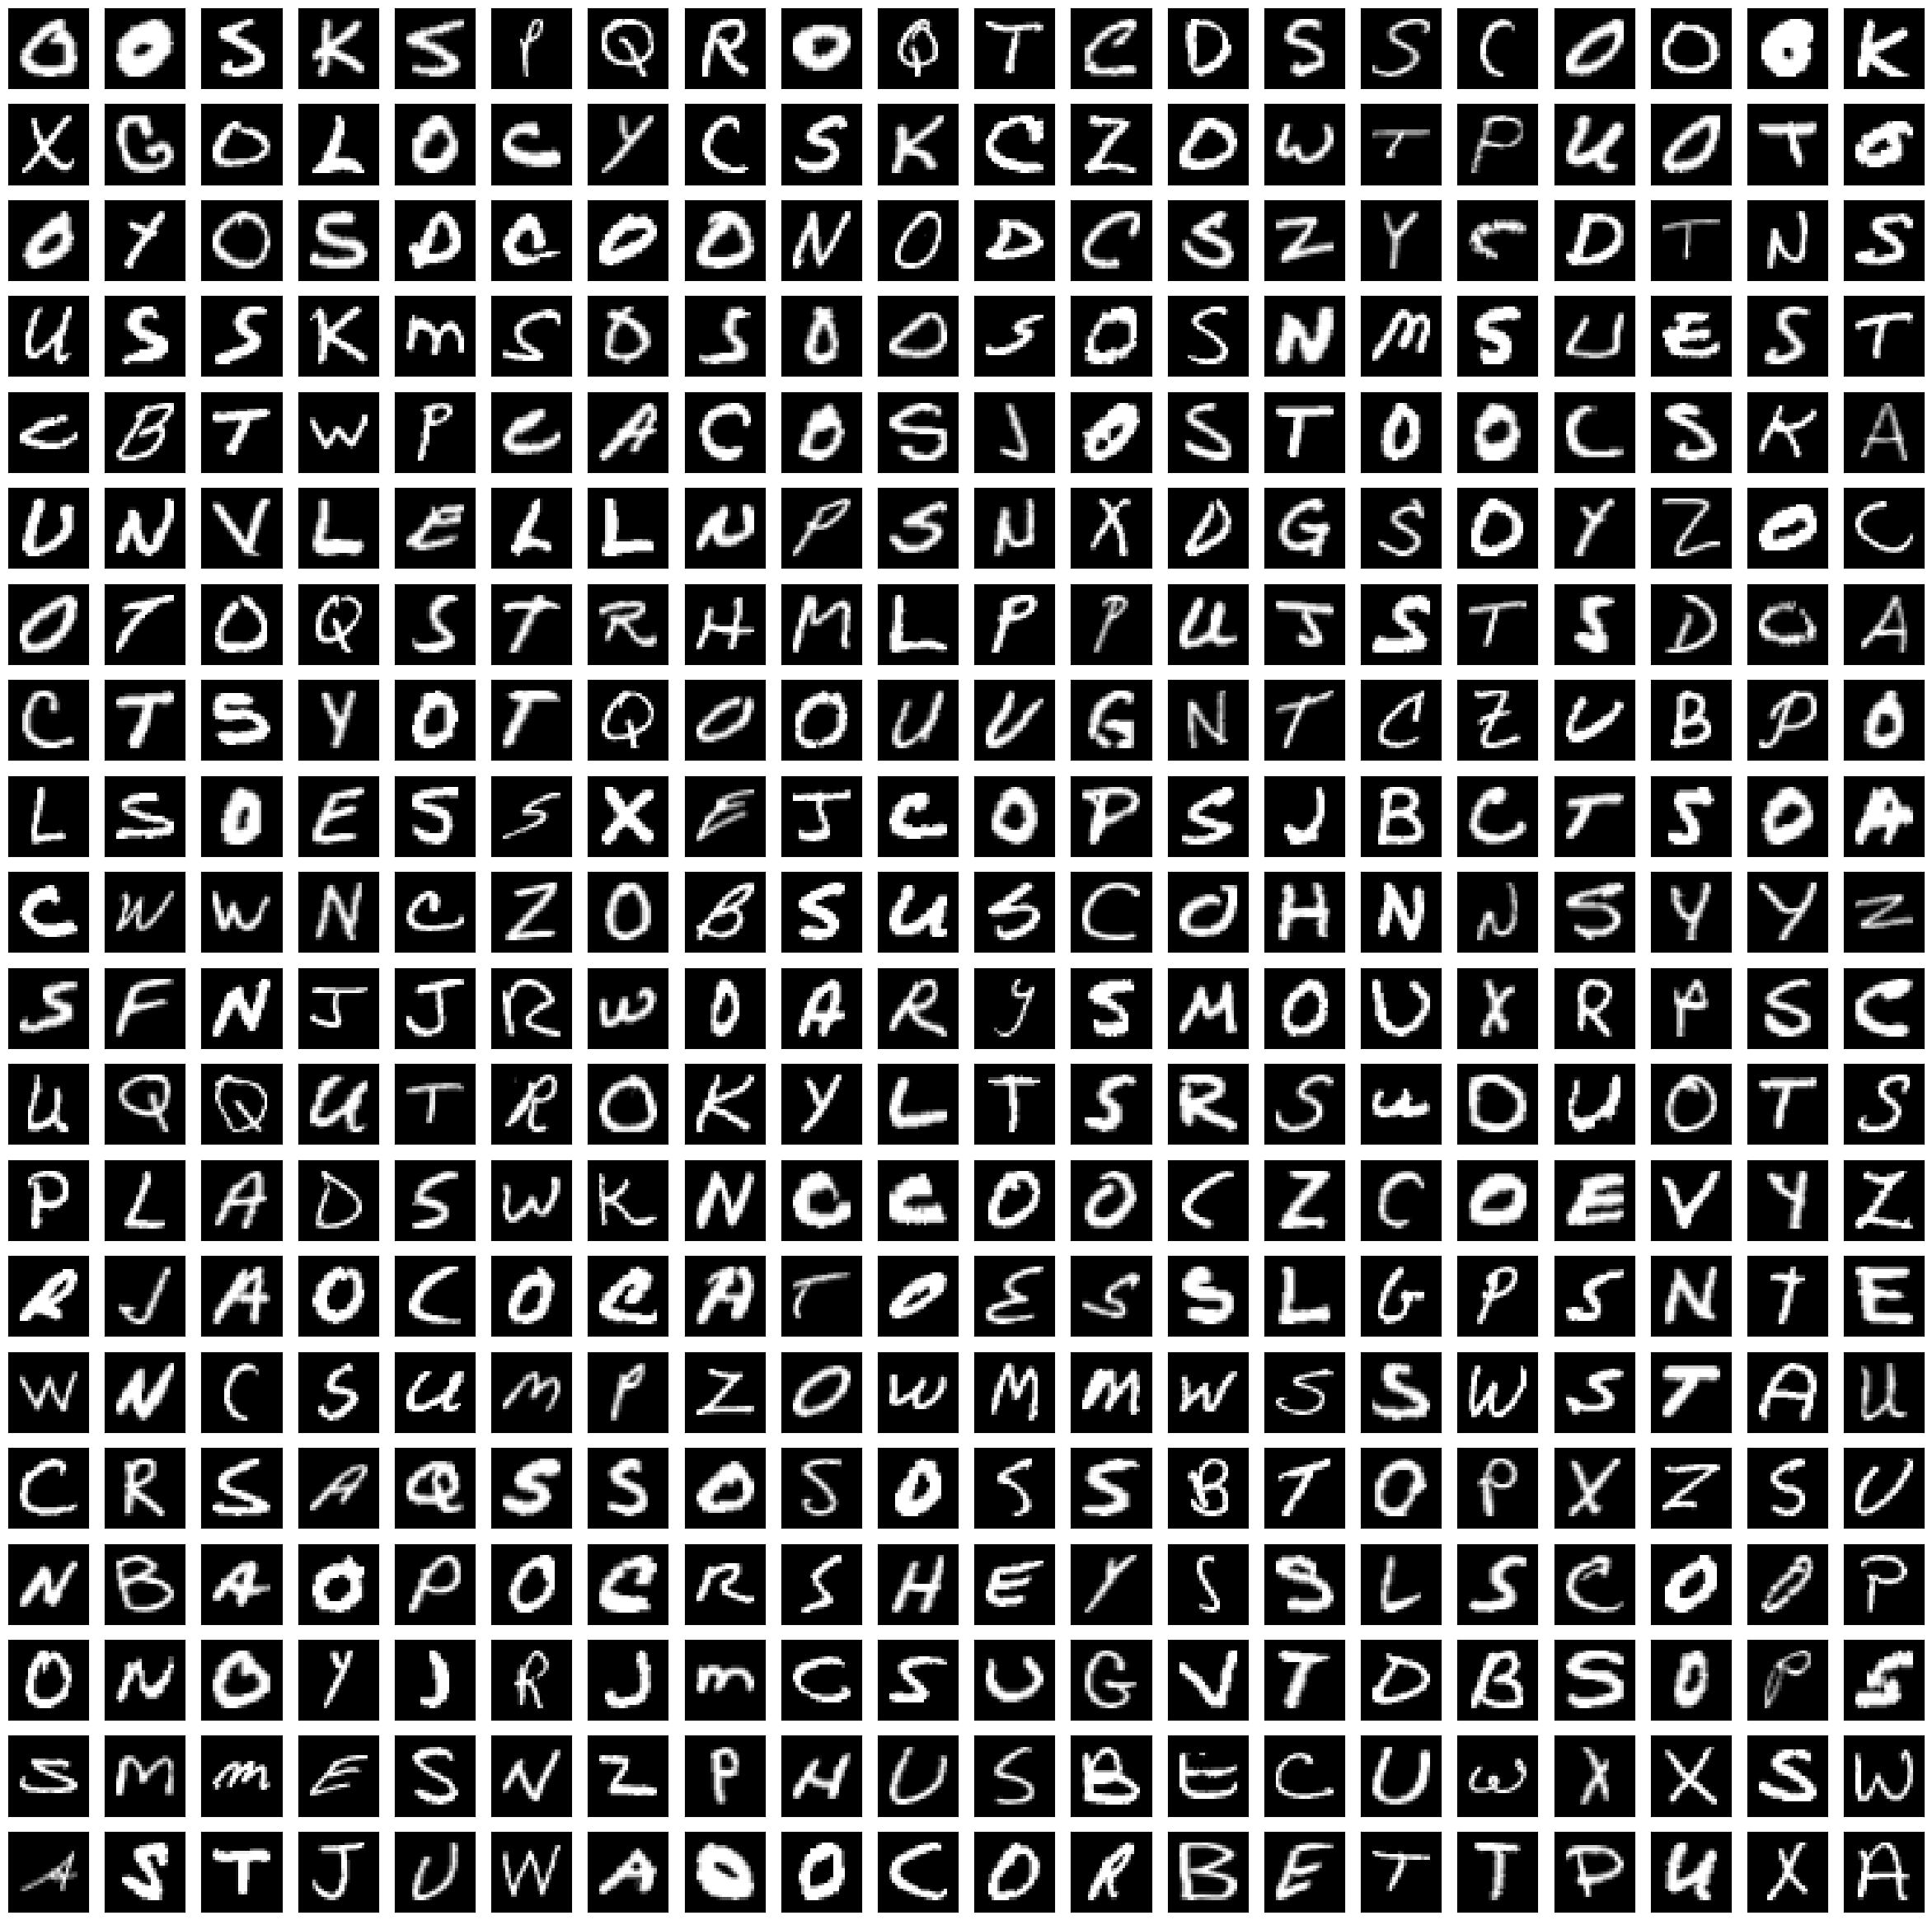

In [28]:
a=np.random.randint(low=0,high=372449,size=400)
fig=plt.figure(figsize=(30,30))
c=1
for i in a:
    fig.add_subplot(20,20,c)
    plt.xticks([]);    plt.yticks([]);    plt.imshow(x[i],cmap='gray')
    c+=1
del a

In [29]:
del c, alphabets_list, counts, unique #deleting further not required variables due to memory issues 

In [30]:
x.shape

(372450, 28, 28)

In [31]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,labels,test_size=0.01)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(368725, 28, 28) (3725, 28, 28) (368725,) (3725,)


In [32]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout
from keras.layers import Flatten
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import SGD

In [38]:
nn_model = Sequential([Conv2D(128,(3,3),activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1),padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    MaxPooling2D(2,2),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    Conv2D(64,(3,3),activation='relu', kernel_initializer='he_uniform',padding='same'),
                    BatchNormalization(),
                    MaxPooling2D(2,2),
                    Flatten(),
                    Dense(100,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.1),
                    Dense(64,activation='relu',kernel_initializer='he_uniform'),
                    Dropout(0.125),
                    BatchNormalization(),
                    Dense(26,activation='softmax')])
nn_model.compile(loss='sparse_categorical_crossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])
nn_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 128)    │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 26)             │         1,690 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 471,294 (1.80 MB)

 Trainable params: 471,038 (1.80 MB)

 Non-trainable params: 256 (1.00 KB)

Fitting the Neural Network model

In [39]:
nn_model_fit = nn_model.fit(x=x_train,y=y_train,validation_split=0.1,epochs=1)

10371/10371 ━━━━━━━━━━━━━━━━━━━━ 2001s 193ms/step - accuracy: 0.9076 - loss: 0.3310 - val_accuracy: 0.9837 - val_loss: 0.0598


In [40]:
# Save the model
nn_model.save('model.h5')
# Load the model
from keras.models import load_model
nn_model_load = load_model('model.h5')

In [41]:
def test_images(n=225):
    index=np.random.randint(low=0,high=3720,size=n)
    fig=plt.figure(figsize=(30,40))
    for i in range(n):
        [pred]=nn_model_load.predict(x_test[index[i]].reshape(1,28,28,1))
        pred=np.argmax(pred)
        actual=y_test[index[i]]
        fig.add_subplot(15,15,i+1)
        plt.xticks([])
        plt.yticks([])
        if actual==pred:
            plt.title(alphabets[pred],color='green',fontsize=25,fontweight="bold")
        else:
            plt.title(alphabets[pred],color='red',fontsize=25,fontweight="bold")
        plt.imshow(x_test[index[i]].reshape(28,28),cmap='gray')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━

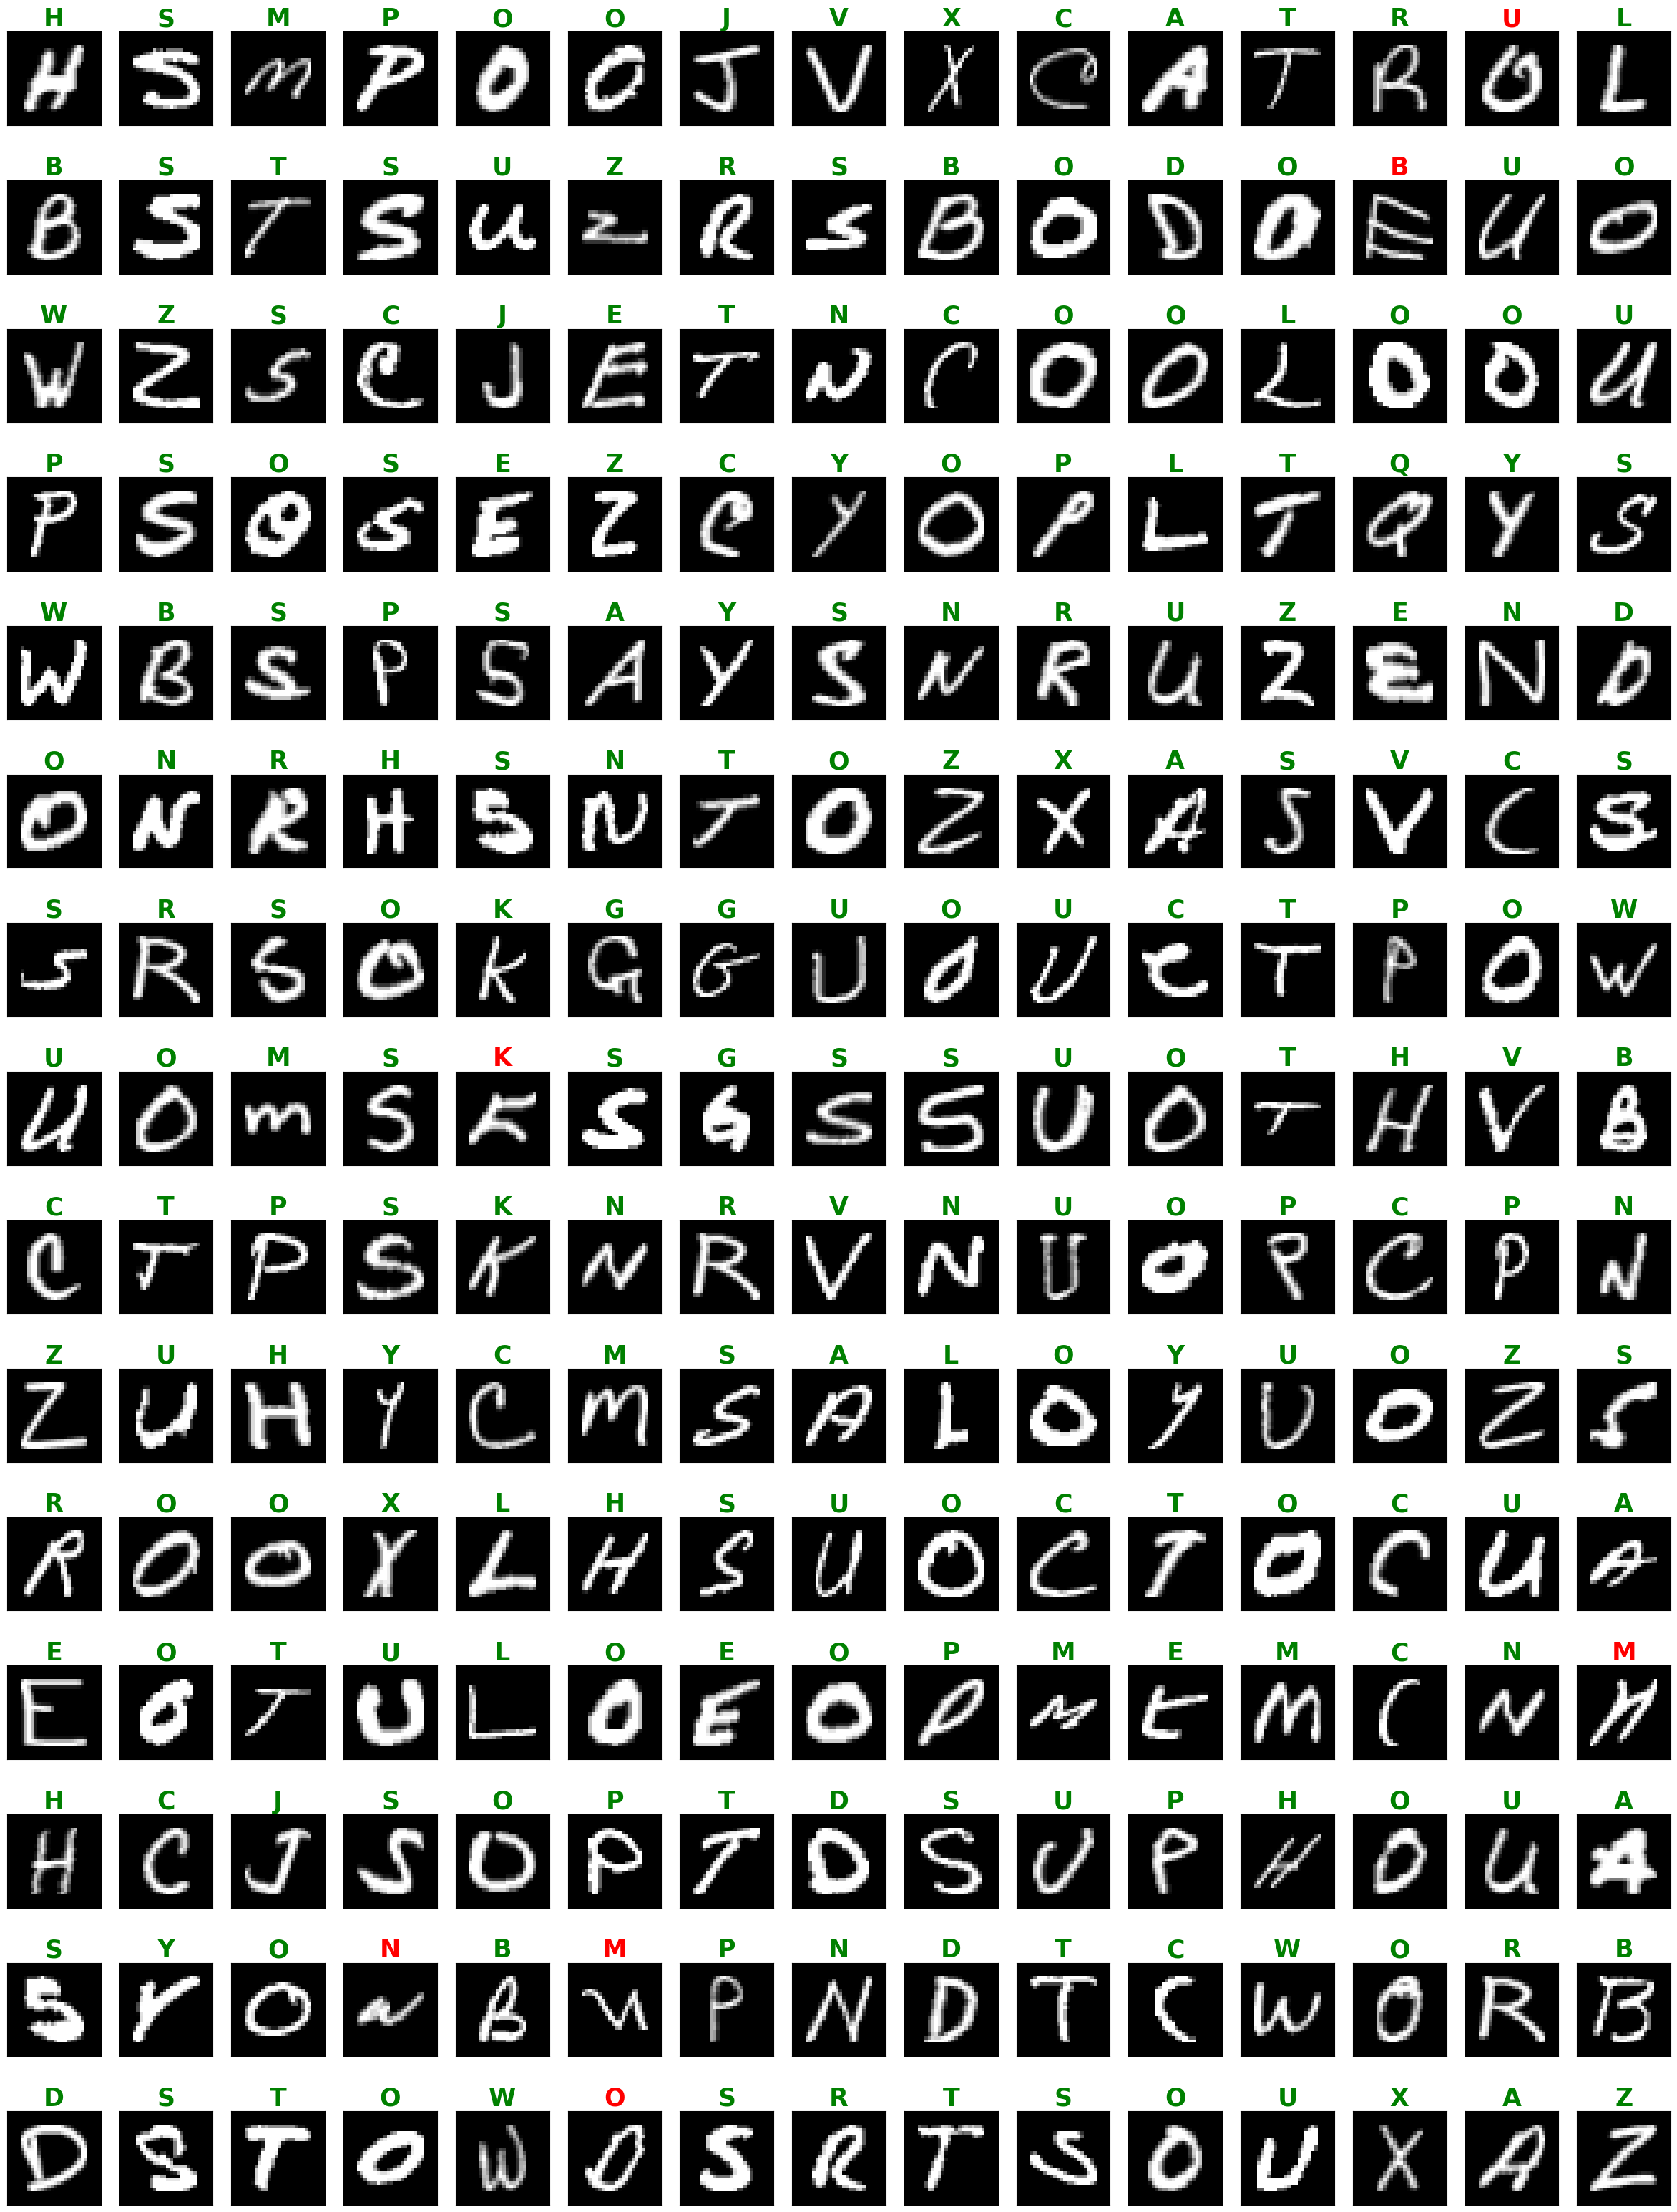

In [42]:
test_images()

In [46]:
alpha = list('ABCDEFGHIJKLMNOPQRSTUVWXYZ')

In [163]:
def unseendata_test(image):
    
    blur_image=cv2.medianBlur(image,7)

    grey = cv2.cvtColor(blur_image, cv2.COLOR_BGR2GRAY)

    thresh = cv2.adaptiveThreshold(grey,200,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,41,25)

    contours,hierarchy= cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    preprocessed_digits = []

    
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda b:b[1][0], reverse=False))


    for c in contours:
        x,y,w,h = cv2.boundingRect(c)
        
        cv2.rectangle(blur_image, (x,y), (x+w, y+h), color=(255, 0, 0), thickness=2)
        
        digit = thresh[y:y+h, x:x+w]
         
        resized_digit = cv2.resize(digit, (18,18))
        
        padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
        
        preprocessed_digits.append(padded_digit)
    plt.xticks([])
    plt.yticks([])
    plt.title("Input Image",color='red')
    plt.imshow(image, cmap="gray")
    plt.show()

    inp = np.array(preprocessed_digits)
    figr=plt.figure(figsize=(len(inp),4))
    i=1
    alphabets_unseen=[]
    out_values = [[] for _ in range(26)]

    for digit in preprocessed_digits:
        [prediction] = nn_model.predict(digit.reshape(1, 28, 28, 1)/255.)
        max_prob = np.max(prediction)
        if max_prob >= 0.99:
            pred = alpha[np.argmax(prediction)]
            alphabets_unseen.append(pred)
            figr.add_subplot(1,len(inp),i)
            i+=1
            plt.xticks([])
            plt.yticks([])
            plt.imshow(digit.reshape(28, 28), cmap="gray")
            plt.title(pred,color='green',fontsize=18,fontweight="bold")

            out_values[np.argmax(prediction)].append(digit.flatten().tolist())
            print(np.argmax(prediction))
        
    print("Alphabets detected : " ,*alphabets_unseen)
    return out_values

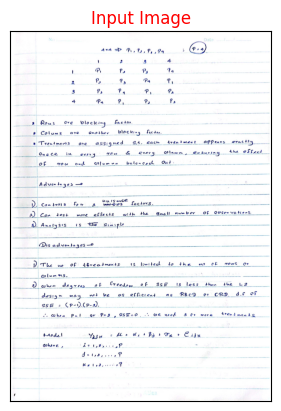

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
14
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━

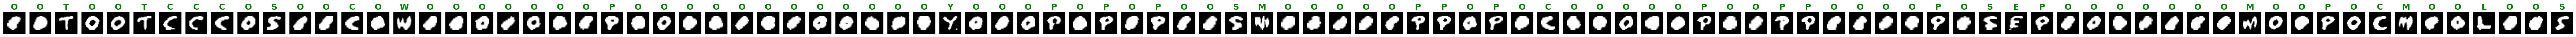

In [164]:

Extracted_letters = unseendata_test(np.array(images[4]))

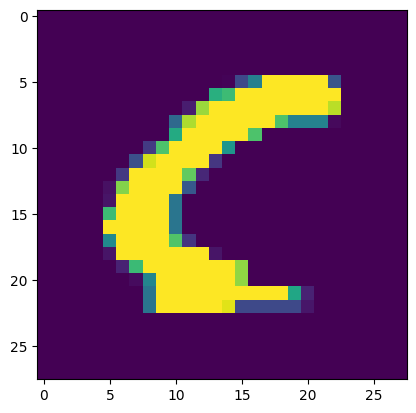

In [170]:
plt.imshow(np.array(Extracted_letters[2][0]).reshape(28,28))